## Usage

<div style="background: #efffed;
            border: 1px solid grey;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
    <i class="fa-play fa" 
       style="font-size: 40px;
              line-height: 40px;
              margin: 8px;
              color: #444;">
    </i>
    <center>
    To run the selected code cell, hit <pre style="background: #efffed">Shift + Enter</pre>
    </center>
</div>

# Radiation

Here we ask what the surface temperature of a planet, with a mean albedo, at some distance $R_o$ from a star of radius $R_s$, will be if the star is emitting with a peak wavelength of $\lambda_{pk}$.  The ingredients to the problem, discussed in chapter 1 of the Geomechanics Notes, include the inverse square law, Wien's displacement law, and the Stefan-Boltzmann law of radiation. By the end of the exercise we wish to combine these to calculate the surface temperature, and then we can turn it around and ask at what distance from a star of known peak radiative wavelength a planet must be in order to have a surface temperature near the freezing point of water, 273.15K. As this is termed the habitable zone, and the surface temperature is just right there, it is also called the Goldilocks Zone.

The Stefan-Boltzmann law says:

$E = \sigma T^4$

where $E$ is ..., $\sigma$ is ..., and $T$ is ...

In [1]:
# arrays: Numpy

import numpy
import pylab
import random

In [341]:
# all of the required numbers for the calculation

sigma = 5.67e-8; # stefan-boltzmann constant
Ro = 1.496e8 # km radius of the orbit (1.5e8 for earth)
Rs = 0.696e6 # radius of the star
albedo = 0.3 # mean albedo of the planet
lambda_pk = 0.5 # peak wavelength of radiation from the star in microns
a = 2898 # constant in Wien's law if radiation wavelength is in microns

In [342]:
# First we calculate the temperature of the star's surface
# knowing the measured peak wavelength of the radiation from the star
Ts = a/lambda_pk # temperature in Kelvins

In [343]:
Ts

5796.0

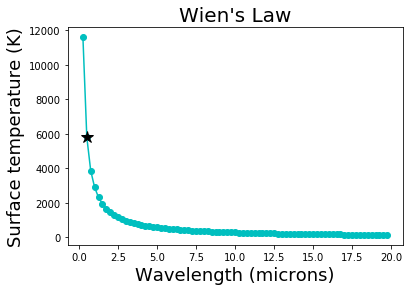

In [344]:
# Now show this in a plot to see what Wien's Law looks like

# create an arry of wavelengths
lambda_max = 20  # length of domain, m
dlambda = 0.25     # distance interval, m
lambda_plot = numpy.arange(dlambda, lambda_max, dlambda)
    
Ts_plot = a/lambda_plot # temperature in Kelvins for each wavelength in the array
    
# and then plot it    
pylab.plot(lambda_plot, Ts_plot, 'co-')
pylab.plot(lambda_pk, Ts, 'k*',markersize=12)
pylab.xlabel('Wavelength (microns)',fontsize=18)
pylab.ylabel('Surface temperature (K)',fontsize=18)
pylab.title("Wien's Law",fontsize = 20)
pylab.show()

# I plot it this way because what we MEASURE is the wavelength, 
# and what we INFER from that measurment is the surface temperature

In [345]:
# Now calculate the energy flux from the star's surface using the Stefan-Boltzmann Law
Qs = sigma*(Ts**4) # in Watts/square meter

This Stefan-Boltzmann Law is very sensitive to the surface temperature of the radiating body. Here we plot it to demonstrate this sensitivity.

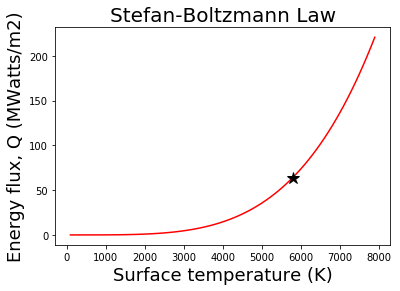

In [346]:
Ts_max = 8000  
dTs = 100     # distance interval, millions of km
Ts_plot = numpy.arange(100, Ts_max, dTs)
    
Qs_plot = sigma*(Ts_plot**4) # in Watts/square meter

pylab.plot(Ts_plot, Qs_plot/1e6, 'r-')
pylab.plot(Ts, Qs/1e6, 'k*',markersize=12)
pylab.xlabel('Surface temperature (K)',fontsize=18)
pylab.ylabel('Energy flux, Q (MWatts/m2)',fontsize=18)
pylab.title("Stefan-Boltzmann Law",fontsize = 20)
#pylab.axes().set_aspect('equal', 'datalim')
pylab.show()

This sensitivity is extreme.  It is often useful in such cases to plot it not on linear-linear axes but on log-log axes. The slope on such plots is in fact the power in a powerlaw relationship.  Here it should be 4.

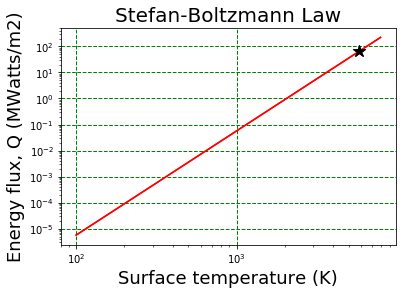

In [364]:
pylab.loglog(Ts_plot, Qs_plot/1e6, 'r-')
pylab.loglog(Ts, Qs/1e6, 'k*',markersize=12)
pylab.xlabel('Surface temperature (K)',fontsize=18)
pylab.ylabel('Energy flux, Q (MWatts/m2)',fontsize=18)
pylab.title("Stefan-Boltzmann Law",fontsize = 20)
pylab.grid(color='g', linestyle='--', linewidth=1)
pylab.show()

You should be able to inspect this plot and determine that the slope is in fact 4. (rise of 4 units for every run of 1 unit, here the units being factors of 10)

In [365]:
Qs

63987709.73867435

In [366]:
# Now calculate the energy flux Qo at a distance from star of Ro, the radius of the orbit
# Here we employ the inverse square law

Qo = Qs * ((Rs/Ro)**2) # for Earth this is called the solar constant, again in W/m2

In [367]:
Qo

1385.006648780423

Let's now explore at what this inverse square law looks like. We expect that the flux falls off with distance from the star, but what does it actually look like?

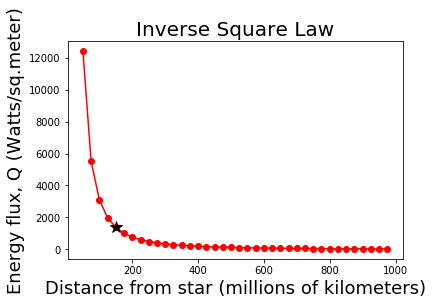

In [368]:
R_max = 1000  
dR = 25     # distance interval, millions of km
R_plot = numpy.arange(2*dR, R_max, dR)
    
Q_plot = Qs * (((Rs/1e6)/R_plot)**2) # temperature in Kelvins
    
pylab.plot(R_plot, Q_plot, 'ro-')
pylab.plot(Ro/1e6, Qo, 'k*',markersize=12)
pylab.xlabel('Distance from star (millions of kilometers)',fontsize=18)
pylab.ylabel('Energy flux, Q (Watts/sq.meter)',fontsize=18)
pylab.title("Inverse Square Law",fontsize = 20)
#pylab.axes().set_aspect('equal', 'datalim')
pylab.show()

In [369]:
# calculate the surface temperature of the planet 
# employing an energy balance and the planet's albedo
To = (Qo**0.25) * ((1-albedo)/(4*sigma))**(0.25)

In [370]:
To

255.69763549798782

In [371]:
# or in celcius
T = To-273.15

In [372]:
T

-17.45236450201216

It's Goldilocks time!  We wish now to calculate the orbital distance required for a planet oribiting another star, whose peak radiative wavelength we can measure, at which water would be close to the triple point, T=273.15K.  So we solve the temperature equation used above, plugging in this specified surface temperature, for the unknown orbital distance R.

In [373]:
lambda_star_max = 1.5  # wavelength maximum, microns
dlambda_star = 0.05     # wavelength interval, microns
lambda_star_plot = numpy.arange(5*dlambda_star, lambda_star_max, dlambda_star)

# and we will use some alternative albedos just to put brackets around it
albedo1 = 0.5
albedo2 = 0.1
Rstar = Rs # assumes the star is the same size and our sun
R = Rstar * (a/(273.15*lambda_star_plot))**(2.0) * ((1-albedo)/4)**0.5
R1 = Rstar * (a/(273.15*lambda_star_plot))**(2.0) * ((1-albedo1)/4)**0.5
R2 = Rstar * (a/(273.15*lambda_star_plot))**(2.0) * ((1-albedo2)/4)**0.5
# Note that again this is an inverse square relationship...no wonder it looks the same
# as the inverse square law on the plot below!

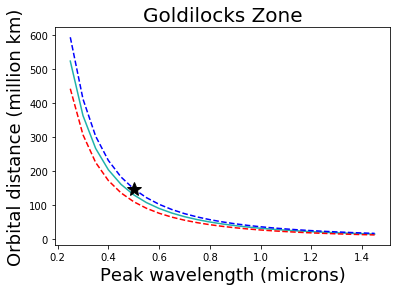

In [374]:
pylab.plot(lambda_star_plot, R/1e6, 'lightseagreen')
pylab.plot(lambda_star_plot, R1/1e6, 'r--')
pylab.plot(lambda_star_plot, R2/1e6, 'b--')
pylab.plot(lambda_pk,Ro/1e6,'k*',markersize=14)
pylab.xlabel('Peak wavelength (microns)',fontsize=18)
pylab.ylabel('Orbital distance (million km)',fontsize=18)
pylab.title("Goldilocks Zone",fontsize = 20)
pylab.show()